In [71]:
# Read dataset and split to train and test data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the csv file to pandas dataframe
dataset = pd.read_csv('assets/output/preprocessedDataset.csv')

print(dataset)

# Split the dataset to X and Y
Y = dataset.loc[:,'visitor']
X = dataset.drop(['date','visitor'], axis=1)


# Split the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

            date         0         1         2         3         4         5  \
0     2008-10-01 -0.531012  0.041365 -0.770828 -0.725876 -0.459515  0.699810   
1     2008-10-02 -1.068289  0.525580 -0.660246 -0.535342 -0.910095 -0.660034   
2     2008-10-03 -0.660196  0.337347 -0.235235 -0.055172 -0.674873  0.059439   
3     2008-10-04 -0.021887  0.021320 -0.460162  0.270666 -0.744668 -0.343748   
4     2008-10-05  0.171066  0.469982  0.109066  0.381054 -1.249365 -0.764723   
...          ...       ...       ...       ...       ...       ...       ...   
3946  2020-01-27  2.844108 -0.608724 -1.418971  1.027507  0.803501 -0.957782   
3947  2020-01-28  3.083770 -0.695220 -1.437778  0.214919  0.906744 -1.273862   
3948  2020-01-29  3.304144  0.034362 -1.130913  0.151357  1.675816 -1.354045   
3949  2020-01-30  3.775263 -0.174743 -0.644500  1.231791  2.061240 -2.349508   
3950  2020-01-31  3.422687 -0.188178 -1.148704  0.346256  1.528104 -0.683796   

             6         7         8  ...

In [72]:
# Make the Model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

grid_params = {'n_estimators': np.arange(300,600, 100),
            'max_depth': np.arange(1,5,1),
            'min_samples_split': np.arange(2,5,1),
            'learning_rate': [0.05,0.1],
            'loss': ['squared_error']}

model = GradientBoostingRegressor(random_state=0)

grid_model = GridSearchCV(model, param_grid=grid_params, cv=5, n_jobs=-1)

In [73]:
# Fit the model
from sklearn.metrics import mean_squared_error


grid_model.fit(X_train, Y_train)

print('최적 하이퍼 파라미터:\n', grid_model.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_model.best_score_))

최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}
최고 예측 정확도: 0.2645


In [74]:
# Define the model with best parameters

model = GradientBoostingRegressor(**grid_model.best_params_)
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))


0.28926851346190685


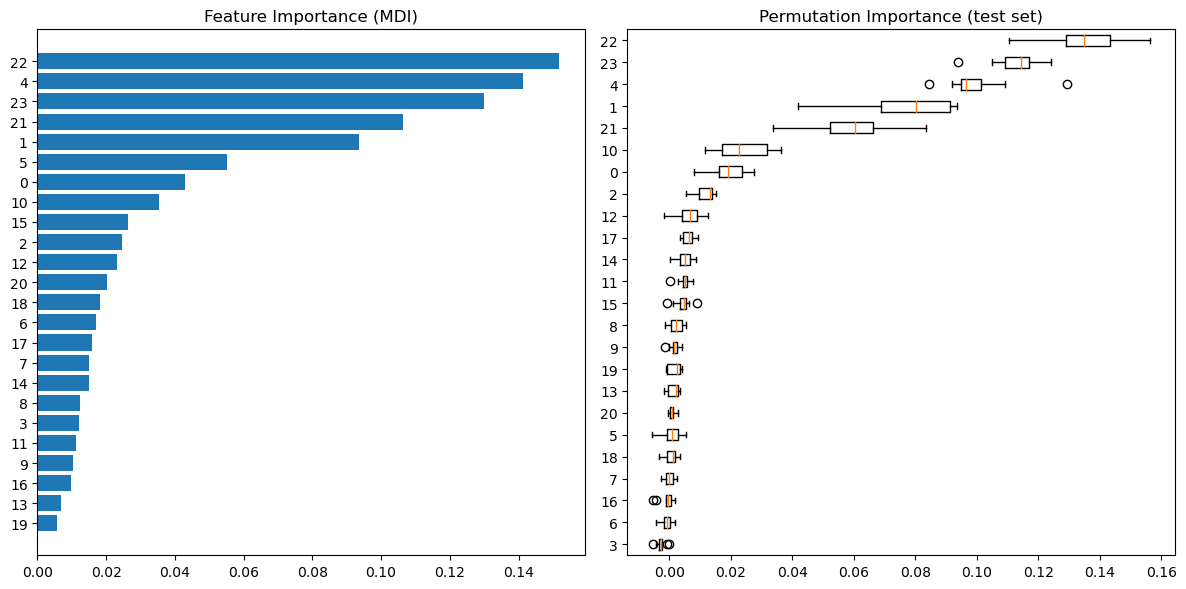

In [75]:
from sklearn.inspection import permutation_importance


feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [76]:
reduced_X = X_train.iloc[:, sorted_idx[30:]]

model = GradientBoostingRegressor(**grid_model.best_params_)
model.fit(reduced_X, Y_train)

print(model.score(X_test.iloc[:, sorted_idx[30:]], Y_test))

ValueError: at least one array or dtype is required